ANGGOTA KELOMPOK:

1. DINA MAULIDATUR RAHMA (2141720199)
2. SUKMA GLADYS VELLANIE (2141720179)

Tugas

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
---
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
  - AKURASI
  - CONFUSION MATRIX
  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


PRA PENGOLAHAN DATA

In [2]:

import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
import numpy as np
import pandas as pd

In [4]:
from tensorflow.keras.datasets import mnist

# Muat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

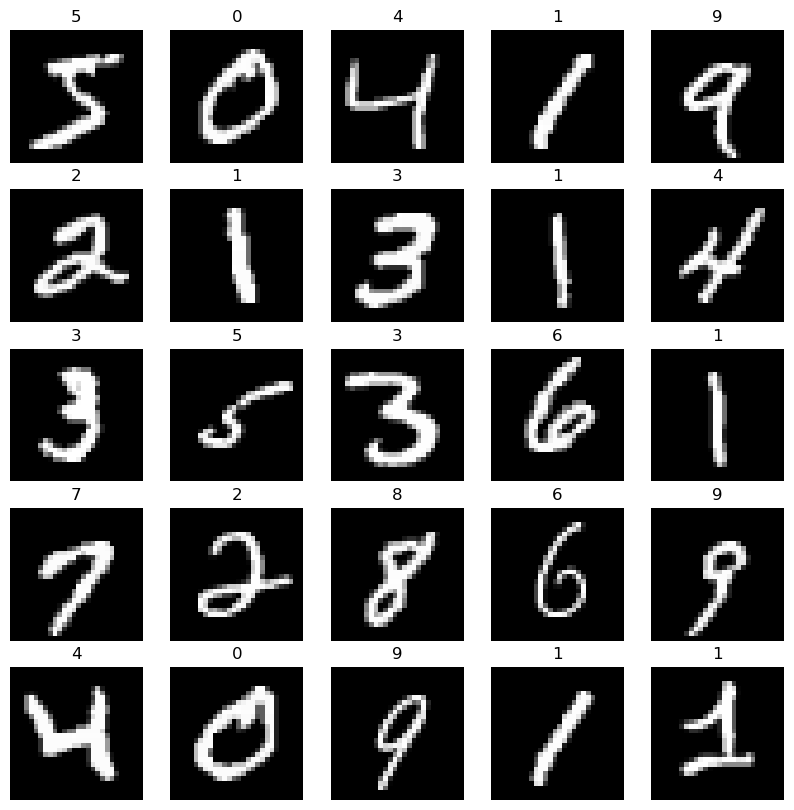

In [5]:
import matplotlib.pyplot as plt

# Tampilkan beberapa contoh data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

In [6]:
from sklearn.preprocessing import LabelBinarizer

# Contoh label kelas
labels = [2, 0, 1, 3, 2, 1, 0, 3]

# Membuat instance LabelBinarizer
label_binarizer = LabelBinarizer()

# Melakukan one-hot encoding pada label
one_hot_labels = label_binarizer.fit_transform(labels)

# Hasil one-hot encoding
print(one_hot_labels)

[[0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]]


In [7]:
from sklearn.preprocessing import OneHotEncoder

# Contoh data kategorikal
data = {'Geography': ['France', 'Germany', 'Spain', 'France', 'Spain']}

# Membuat DataFrame
df = pd.DataFrame(data)

# Membuat instance OneHotEncoder
encoder = OneHotEncoder()

# Melakukan One-Hot Encoding pada kolom "Geography"
encoded_data = encoder.fit_transform(df[['Geography']])

# Mengonversi hasil encoding ke DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Geography']))

# Hasil One-Hot Encoding
print(encoded_df)

   Geography_France  Geography_Germany  Geography_Spain
0               1.0                0.0              0.0
1               0.0                1.0              0.0
2               0.0                0.0              1.0
3               1.0                0.0              0.0
4               0.0                0.0              1.0


In [8]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi pelatihan (train) dan pengujian (test)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Jika Anda ingin melihat jumlah data yang telah dibagi:
print(f"Jumlah data pelatihan: {len(x_train)}")
print(f"Jumlah data validasi: {len(x_val)}")
print(f"Jumlah data pengujian: {len(x_test)}")

Jumlah data pelatihan: 48000
Jumlah data validasi: 12000
Jumlah data pengujian: 10000


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Contoh data numerik
data = [[2.0], [4.0], [1.0], [3.0]]

# Membuat instance MinMaxScaler
scaler = MinMaxScaler()

# Melakukan Min-Max Scaling pada data
scaled_data = scaler.fit_transform(data)

# Hasil dari scaling
print(scaled_data)

[[0.33333333]
 [1.        ]
 [0.        ]
 [0.66666667]]


In [10]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Normalisasi data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

ann = tf.keras.models.Sequential()
ann.add(Flatten(input_shape=(28, 28)))  # Flatten gambar 28x28 menjadi array 1D
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(10, activation='softmax'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Pelatihan model
ann.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
750/750 [==============================] - 14s 10ms/step - loss: 0.3217 - accuracy: 0.3284 - val_loss: 0.2362 - val_accuracy: 0.4623
Epoch 2/5
750/750 [==============================] - 6s 8ms/step - loss: 0.2191 - accuracy: 0.5335 - val_loss: 0.2057 - val_accuracy: 0.5917
Epoch 3/5
750/750 [==============================] - 6s 8ms/step - loss: 0.1668 - accuracy: 0.6947 - val_loss: 0.1365 - val_accuracy: 0.7664
Epoch 4/5
750/750 [==============================] - 6s 7ms/step - loss: 0.1224 - accuracy: 0.7960 - val_loss: 0.1106 - val_accuracy: 0.8211
Epoch 5/5
750/750 [==============================] - 6s 8ms/step - loss: 0.1060 - accuracy: 0.8316 - val_loss: 0.0992 - val_accuracy: 0.8475


In [11]:
# Buat prediksi pada data pengujian
predictions = ann.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [12]:
# Konversi prediksi ke label
predicted_labels = [prediction.argmax() for prediction in predictions]
actual_labels = [label.argmax() for label in y_test]

In [13]:
print(f"Prediksi: {predicted_labels}")
print(f"Label Sebenarnya: {actual_labels}")

Prediksi: [7, 2, 1, 0, 4, 1, 4, 9, 4, 9, 0, 2, 9, 0, 1, 5, 9, 7, 2, 4, 9, 6, 6, 0, 4, 0, 7, 4, 0, 1, 3, 1, 3, 2, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 3, 1, 6, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 0, 7, 8, 4, 3, 7, 9, 2, 4, 3, 0, 7, 0, 2, 9, 1, 9, 3, 5, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 1, 6, 9, 6, 0, 7, 4, 9, 9, 2, 1, 9, 4, 8, 1, 3, 9, 9, 4, 4, 4, 9, 8, 3, 4, 7, 6, 9, 9, 0, 5, 8, 5, 6, 6, 2, 8, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 9, 1, 8, 2, 0, 4, 4, 8, 5, 5, 1, 4, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 8, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 4, 2, 3, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 2, 7, 3, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 2, 7, 7, 9, 2, 2, 4, 1, 3, 5, 8, 9, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 8, 7, 7, 9, 1, 8, 1, 5, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 8, 7, 9, 2, 6, 4, 1, 2, 4, 2, 9, 6, 0, 4, 0, 0, 2, 8, 6, 8, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 3, 1, 9, 6, 4, 2, 2, 9, 7, 9, 3, 0, 4, 2, 0, 9, 1,

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Hitung akurasi
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Buat confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)
     

Akurasi: 84.75%
Confusion Matrix:
[[ 935    0   11    1    2   15    8    7    1    0]
 [   0 1113    5    3    0    1    4    0    8    1]
 [  15   12  833   16   20   25   43    6   60    2]
 [   4    2   27  872    0   21    2   23   50    9]
 [   1   12    5    0  896    4   14    0    2   48]
 [  61    3   87   91   37  492   15   50   46   10]
 [  18    4   46    2    6    4  878    0    0    0]
 [   7   21    7    2    6   16    0  849   54   66]
 [   6   48   58    9   27   44    4    7  763    8]
 [   5    4    2    3  101   21    0   18   11  844]]
